In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [53]:
from option_prediction import option_prediction
from plot_option_prediction import plot_option_prediction

In [54]:
#Dates for which we will predict stock prices - Option Expiry Dates, which end on Friday of any week
today = datetime.date.today()
start_date = datetime.date.today()+ datetime.timedelta( (4-today.weekday()) % 7 )
end_date = datetime.date.today() + datetime.timedelta(days=28)
delta = datetime.timedelta(days=7)

option_dates = []

while start_date <= end_date:
    o_d = start_date.strftime("%Y-%m-%d")
    option_dates.append(o_d)
    start_date += delta


option_dates = option_dates[1:]
option_dates

['2020-08-28', '2020-09-04', '2020-09-11', '2020-09-18']

In [55]:
Company_Names = ["AMZN", "MSFT","AAPL", "TSLA", "NFLX","FB","V","NVDA","GOOG","BA","INTC",'AMD']

In [56]:
test = option_prediction(Company_Names=Company_Names, option_dates=option_dates, output_folder=OUTPUT_FOLDER)
test

[*********************100%***********************]  1 of 1 completed


/Users/xpatricklorenzx/Desktop/skriptstuff/FINANCE/option_prediction.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigC_OI['OI_PCT'] = Calls_OI_PCT
/Users/xpatricklorenzx/Desktop/skriptstuff/FINANCE/option_prediction.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigP_OI['OI_PCT'] = Puts_OI_PCT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NameError: name 'today' is not defined

[-2.731265920060007, -1.2901899269530046, -1.0645695027302726, -7.498868962866705]
Exported: Option_Weekly_csv/2020_08_21/Option_Weekly_Plot_2020_08_21.pdf


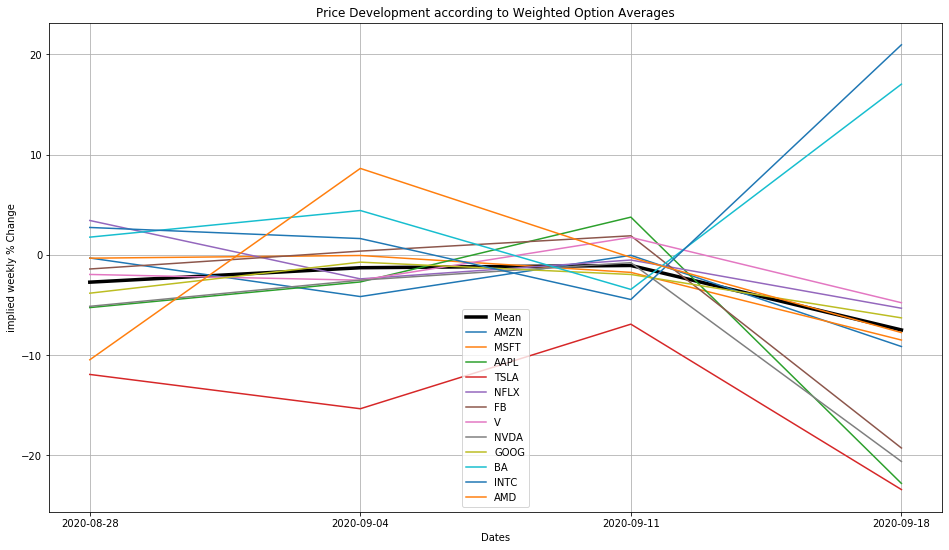

In [26]:
plot_option_prediction(option_prediction=test, Company_Names=Company_Names, 
                       option_dates=option_dates, output_folder=OUTPUT_FOLDER)

In [158]:
C_N_marketCap = []

for x in Option_Analysis_Weekly["Tickers"]:
    ticker = yf.Ticker(x)
    info_dic = ticker.info
    var1 = info_dic['marketCap']
    C_N_marketCap.append(int(var1))
    
marketCap_df = pd.DataFrame({"Tickers": C_N_df, "marketCap": C_N_marketCap})
marketCap_df['MC_billions'] = marketCap_df["marketCap"]/1000000000

df_ratio = pd.merge(Option_Analysis_Weekly, marketCap_df, on='Tickers', how='outer')
df_ratio_cut = df_ratio[["Tickers","MC_billions"]]

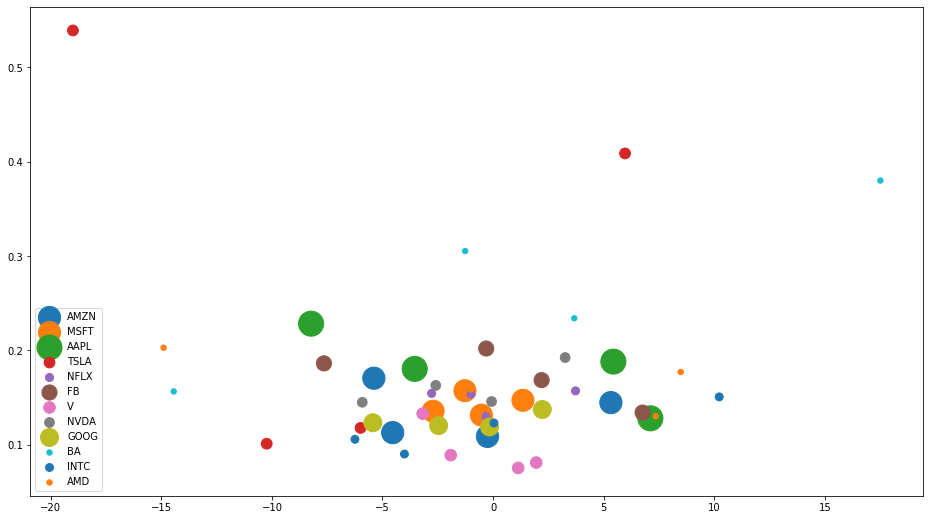

In [176]:
#Further Data Analysis on (1) DataFrame/current and (1) CSV/historical
    
Option_Analysis_Weekly["CP-Diff"] = Option_Analysis_Weekly["Calls_WOI"] - Option_Analysis_Weekly["Puts_WOI"]
Option_Analysis_Weekly[["Calls_WOI","Puts_WOI","Predicted_Opt_Price","CP-Diff"]]
Option_Analysis_Weekly["CP Spread/Price Ratio"] = Option_Analysis_Weekly["CP-Diff"] / \
Option_Analysis_Weekly["Predicted_Opt_Price"]

Option_Analysis_Weekly[["CP Spread/Price Ratio","implied %Change to prior week"]]

Option_Analysis_Weekly_V2 = Option_Analysis_Weekly[["Tickers","implied %Change to prior week","CP Spread/Price Ratio"]]

plt.figure(figsize=(16,9))

for y in Company_Names:
    Option_Analysis_R2 = Option_Analysis_Weekly_V2.loc[lambda Option_Analysis_Weekly_V2: \
                                                       Option_Analysis_Weekly_V2['Tickers']== y, :]
    Option_Analysis_R2_reset = Option_Analysis_R2.reset_index(drop=True)
    df_ratio_cut_V2 = df_ratio_cut.loc[lambda df_ratio_cut: \
                                       df_ratio_cut['Tickers']== y, :]
    df_ratio_cut_V2_reset = df_ratio_cut_V2.reset_index(drop=True)
    plt.scatter(Option_Analysis_R2_reset['implied %Change to prior week'],\
                Option_Analysis_R2_reset['CP Spread/Price Ratio'],s=  df_ratio_cut_V2_reset["MC_billions"]*0.3,\
                label = Option_Analysis_R2_reset['Tickers'][0])
    plt.legend()


In [64]:
#3 X_test, X_train
#1. Price info of last week and currently
#2. Core info of option prediction over next weeks (FUTURE MARKET PREDICTION)
#3. MACD Gradient and Signal (HISTORICAL TECHNICAL PREDICTION)
#4. Cashflow, Growth, EBITDA, P/S, P/E (CURRENT FINANCIAL PREDICTION)

#1 Y_test, Y_train
#Price at expiry

#--> ACCURACY??

#Tensorflow analysis of 3 indicators and their signal strength on price

In [ ]:
def visualize_tree (classifier, X, y, boundaries=True, xlim=True, ylim=True):

    classifier.fit(X,y)
    
    if xlim is None:
        xlim =  (X[:,0].min() - 0.1, X[:,0].max() + 0.1)
    if ylim is None:
        ylim =  (X[:,1].min() - 0.1, X[:,1].max() + 0.1)
        
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
                        
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx,yy, Z, alpha = 0.2, cmap = 'jet')
    
    plt.scatter (X[:,0], X[:,1], c=y, cmap ='jet')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    def plot_boundaries(i, xlim, ylim):
        
        if i < 0:
            return
        
        tree = classifier.tree_
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                           [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                           [tree.threshold[i], xlim[1]], ylim)
            
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                           [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                           [tree.threshold[i], ylim[1]])
    
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

In [ ]:
clf = DecisionTreeClassifier(max_depth=1, random_state = 0)

strikes = ticker_puts['strike']
openInterest = ticker_puts['openInterest']



#my_X = np.array((ticker_puts['strike'], ticker_puts['openInterest']))
arg = np.where(ticker_puts['openInterest'] > x)[0]
my_X = np.array((ticker_puts['strike'][arg], ticker_puts['openInterest'][arg]))
my_Y = np.ones(my_X.shape[1])
arg_calls = np.where(ticker_calls['openInterest'] > x)[0]
my_X_calls = np.array((ticker_calls['strike'][arg_calls], ticker_calls['openInterest'][arg_calls]))
my_Y_calls  = np.zeros(my_X_calls.shape[1])
X = np.hstack((my_X, my_X_calls)).T
Y = np.hstack((my_Y, my_Y_calls))


visualize_tree(clf, X, Y, True, None, None)

In [69]:
#PLOT DIFFERENT EXPIRY DATE MOVES
#SNS PAIRPLOT PUTS PERCENT // CALLS PERCENT // Open Interest Puts / Calls
#options vol  vs realized vol??
#quadrants price indicators
# derivatives? Variance?
# open interest distribution?


In [ ]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')